In [7]:
data['RollingMeanPM25'] = data['PM2.5'].rolling(min_periods=1,window = 30).mean()
data['RollingVarPM25'] = data['PM2.5'].rolling(min_periods=1,window = 30).var()
data['RollingMeanTweets'] = data['freq'].rolling(min_periods=1,window = 30).mean()
data['RollingVarTweets'] = data['freq'].rolling(min_periods=1,window = 30).var()

In [35]:
## ADF Null hypothesis: there is a unit root, meaning series is non-stationary
from statsmodels.tsa.stattools import adfuller

X = np.array(data['freq'])
X = X[~np.isnan(X)]

result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.828782
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [36]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(X)

KPSS Statistic: 0.2586753074524541
p-value: 0.1
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


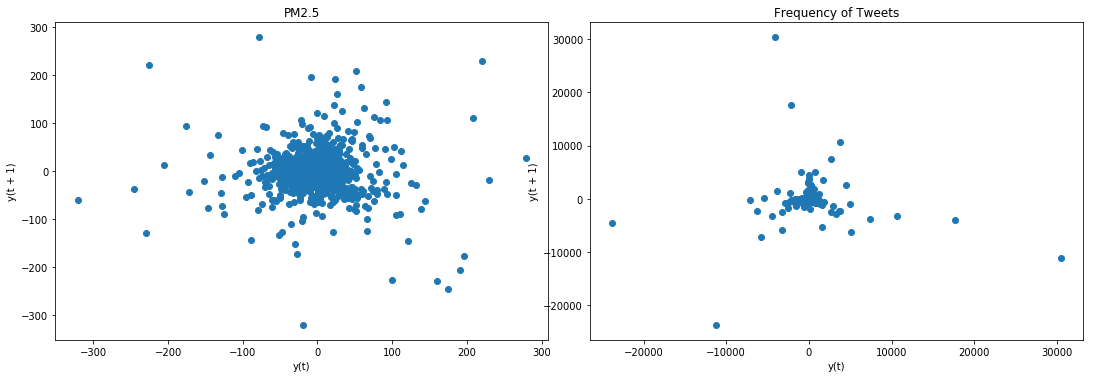

In [44]:
from pandas.plotting import lag_plot
   
f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(data['PM2.5'], ax=ax4)
ax4.set_title('PM2.5');

lag_plot(data['freq'], ax=ax5)
ax5.set_title('Frequency of Tweets');

#lag_plot(series3, ax=ax6)
#ax6.set_title('Tweet and PM2.5');

plt.show()

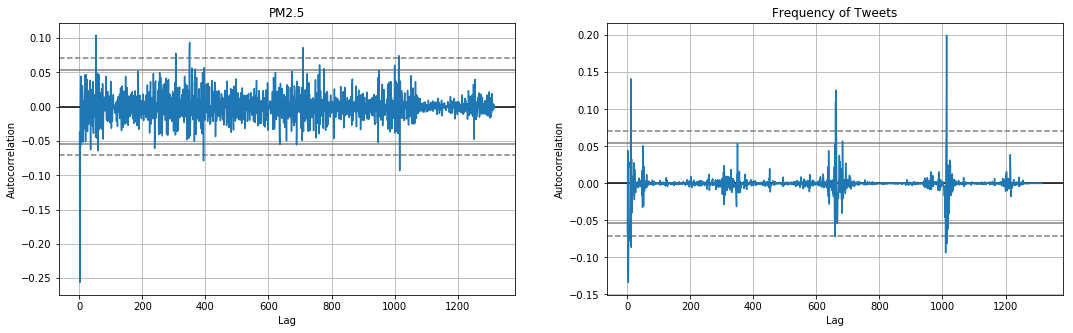

In [54]:

from pandas.plotting import autocorrelation_plot

f3, (ax7, ax8) = plt.subplots(1, 2, figsize=(18, 5))
#f3.tight_layout()

autocorrelation_plot(data['PM2.5'], ax=ax7)
ax7.set_title('PM2.5');

autocorrelation_plot(data['freq'], ax=ax8)
ax8.set_title('Frequency of Tweets');


plt.show()

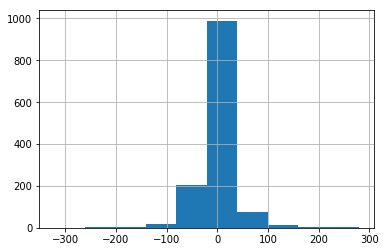

In [55]:
# Plot histogram
data['PM2.5'].hist()
plt.show()

In [57]:
X = data['PM2.5'].values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%.2f, mean2=%.2f' % (mean1, mean2))
print('variance1=%.2f, variance2=%.2f' % (var1, var2))

mean1=0.09, mean2=0.19
variance1=1552.00, variance2=1488.13


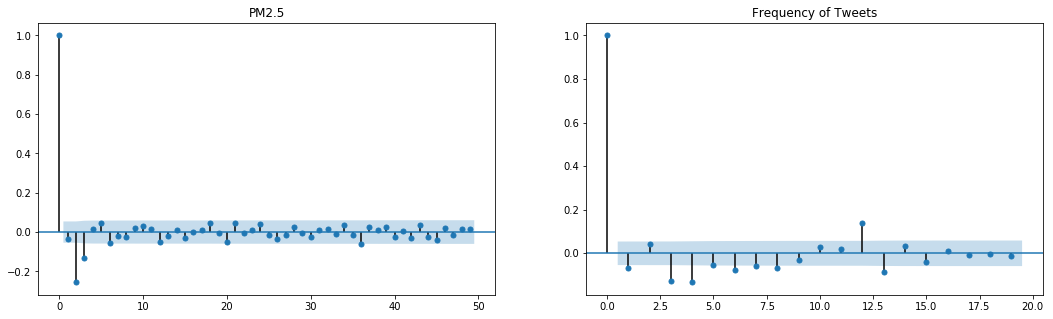

In [59]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
#f3.tight_layout()

plot_acf(data['PM2.5'], ax=ax1, lags = range(0,50))
ax1.set_title('PM2.5')

plot_acf(data['freq'], ax=ax2, lags = range(0, 20))
ax2.set_title('Frequency of Tweets')


plt.show()

Text(0.5,1,'Window Size = 30')

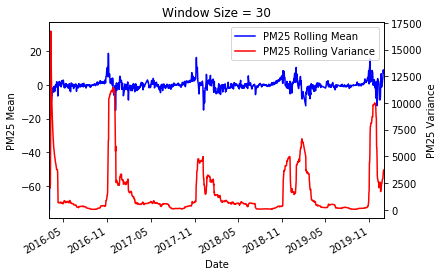

In [8]:
fig, ax = plt.subplots()
y1 = data.RollingMeanPM25.plot(ax=ax, style='b-', label='PM25 Rolling Mean')
y2 = data.RollingVarPM25.plot(ax=ax, style='r-', secondary_y=True, label='PM25 Rolling Variance')
y1.set_ylabel("PM25 Mean")
y2.set_ylabel("PM25 Variance")
y1.set_xlabel("Date")
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)
plt.title("Window Size = 30")

Text(0.5,1,'Window Size = 30')

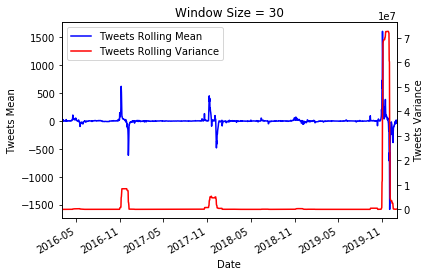

In [9]:
fig, ax = plt.subplots()
y1 = data.RollingMeanTweets.plot(ax=ax, style='b-', label='Tweets Rolling Mean')
y2 = data.RollingVarTweets.plot(ax=ax, style='r-', secondary_y=True, label='Tweets Rolling Variance')
y1.set_ylabel("Tweets Mean")
y2.set_ylabel("Tweets Variance")
y1.set_xlabel("Date")
handles,labels = [],[]
for ax in fig.axes:
    for h,l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)

plt.legend(handles,labels)
plt.title("Window Size = 30")

In [38]:
#define function for kpss test
from statsmodels.tsa.stattools import kpss
#define KPSS
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [41]:
kpss_test(data['freq'])

Results of KPSS Test:


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)


# Setup the VAR Model

In [3]:
data = pd.read_csv('daily-pm25-and-tweets.csv', index_col='time');
data.index = pd.to_datetime(data.index)
data = data.dropna()

In [11]:
# a quick granger causality test. Observe that the lag variable is a magic number for now

from statsmodels.tsa.stattools import grangercausalitytests
maxlag=8
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(data, variables = data.columns)    

,PM2.5_x,freq_x
PM2.5_y,1.0,0.0
freq_y,0.0,1.0


In [5]:
# Let us now do a cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(data)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
PM2.5  ::  111.13    > 12.3212   =>   True
freq   ::  5.14      > 4.1296    =>   True


In [6]:
# obtain the lag P for VAR

model = VAR(train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  21.523090549911185
BIC :  21.551456802954398
FPE :  2225150923.805175
HQIC:  21.533847140363424 

Lag Order = 2
AIC :  21.46776702799471
BIC :  21.515080153217927
FPE :  2105391290.882001
HQIC:  21.48570917931096 

Lag Order = 3
AIC :  21.26631448844193
BIC :  21.33260339955546
FPE :  1721247039.5504344
HQIC:  21.291453835871526 

Lag Order = 4
AIC :  21.2630191096875
BIC :  21.34831279290203
FPE :  1715584990.0731776
HQIC:  21.295367318425512 

Lag Order = 5
AIC :  21.241995085596855
BIC :  21.34632259987438
FPE :  1679894188.4425955
HQIC:  21.28156385088928 

Lag Order = 6
AIC :  21.24020377206939
BIC :  21.363594249375257
FPE :  1676889379.1405258
HQIC:  21.28700481931881 

Lag Order = 7
AIC :  21.229351559953727
BIC :  21.37183420550977
FPE :  1658792123.3798015
HQIC:  21.283396644825416 

Lag Order = 8
AIC :  21.22597901004577
BIC :  21.387583102584586
FPE :  1653210212.0557306
HQIC:  21.287279918574296 

Lag Order = 9
AIC :  21.227111798167382
BIC :  21.40786

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [7]:
# lag 8 seems to be the most optimal
#x = model.select_order(maxlags=12)
#x.summary()

In [9]:
model_fitted = model.fit(8)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 10, May, 2020
Time:                     14:50:58
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    21.3876
Nobs:                     1041.00    HQIC:                   21.2873
Log likelihood:          -13968.4    FPE:                1.65321e+09
AIC:                      21.2260    Det(Omega_mle):     1.60051e+09
--------------------------------------------------------------------
Results for equation PM2.5
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            6.710193         2.286913            2.934           0.003
L1.PM2.5         0.706857         0.032082           22.033           0.000
L1.freq         -0.001110         0.001111           -0.999           0.318
L2.P

In [13]:
# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train.columns, out):
    print(col, ':', round(val, 2))

PM2.5 : 2.0
freq : 2.01


In [14]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

8


In [15]:
#add value of m to lag-order = 8+m = 9
model.select_order(9)

In [24]:
model_fitted = model.fit(9)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

9


In [40]:
## COINTEGRATIOn TEST
import statsmodels.tsa.stattools as ts 
result=ts.coint(train['PM2.5'], train['freq'])
print(result)

(-21.419162859970502, 0.0, array([-3.9066855 , -3.34183566, -3.04840871]))


In [28]:
x.eig

array([0.0384232 , 0.01056517])

## Testing for Granger Causality 
### Toda, H. Y and T. Yamamoto (1995). Statistical inferences in vector autoregressions with possibly integrated processes. Journal of Econometrics, 66, 225-250.


**Step 1**: Test each of the time-series to determine their order of integration. Ideally, this should involve using a test (such as the ADF test) for which the null hypothesis is non-stationarity; as well as a test (such as the KPSS test) for which the null is stationarity. It's good to have a cross-check

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic

In [42]:
data = pd.read_csv('daily-pm25-and-tweets.csv', index_col='time');
data.index = pd.to_datetime(data.index)
data = data.dropna()

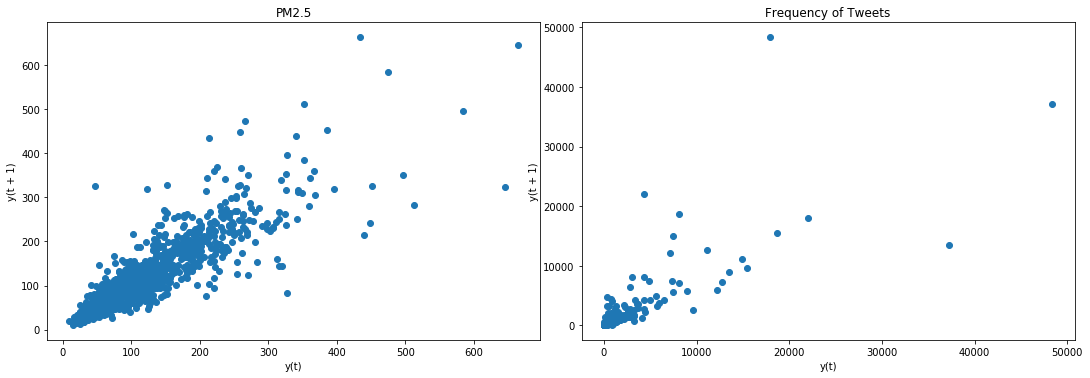

In [43]:
from pandas.plotting import lag_plot
   
f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(data['PM2.5'], ax=ax4)
ax4.set_title('PM2.5');

lag_plot(data['freq'], ax=ax5)
ax5.set_title('Frequency of Tweets');

#lag_plot(series3, ax=ax6)
#ax6.set_title('Tweet and PM2.5');

plt.show()

**Result**: Data is not stationary. We will have to make it stationary using difference operation

In [44]:
#difference operation for sttionarity
rawData = data.copy(deep=True)
data['PM2.5'] = data['PM2.5'] - data['PM2.5'].shift(1)
data['freq'] = data['freq'] - data['freq'].shift(1)
data = data.dropna()

In [47]:
# split data into train and test. We will need this later for VAR analysis
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]

In [51]:
## ADF Null hypothesis: there is a unit root, meaning series is non-stationary
from statsmodels.tsa.stattools import adfuller

X1 = np.array(data['freq'])
X1 = X1[~np.isnan(X)]

result = adfuller(X1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
    
X2 = np.array(data['PM2.5'])
X2 = X2[~np.isnan(X2)]

result = adfuller(X2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.779890
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
ADF Statistic: -12.835204
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [52]:
## KPSS Null hypothesis: there is a no unit root, meaning series is stationary
from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(X1)
kpss_test(X2)

KPSS Statistic: 0.00999113262782692
p-value: 0.1
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary
KPSS Statistic: 0.062367982632608676
p-value: 0.1
num lags: 23
Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1685: FutureWarning: The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'
  warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1711: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


**Result**: 
ADF Null Hypothesis is rejected: Thus, data is stationary
KPSS Null Hypothesis could not be rejected. Thus, data is stationary

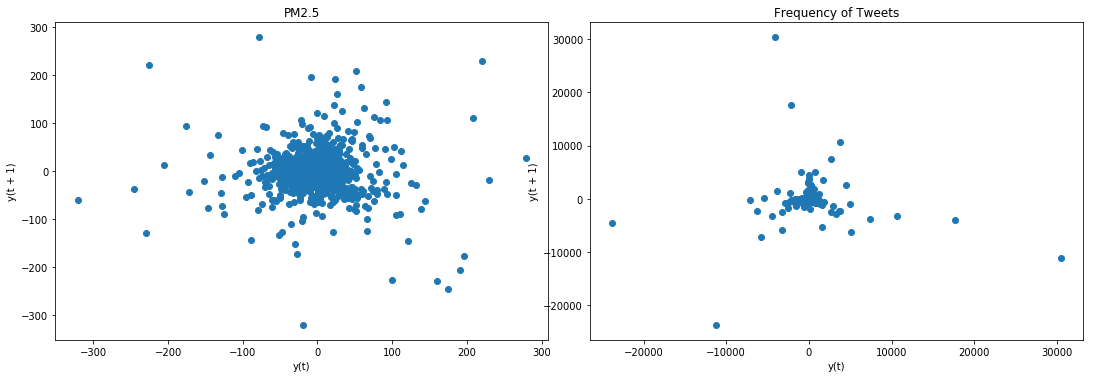

In [53]:
from pandas.plotting import lag_plot
   
f2, (ax4, ax5) = plt.subplots(1, 2, figsize=(15, 5))
f2.tight_layout()

lag_plot(data['PM2.5'], ax=ax4)
ax4.set_title('PM2.5');

lag_plot(data['freq'], ax=ax5)
ax5.set_title('Frequency of Tweets');

#lag_plot(series3, ax=ax6)
#ax6.set_title('Tweet and PM2.5');

plt.show()

**Result:** lag plot is in confirmatory with ADF test and KPSS test

**Step 2**: Let the maximum order of integration for the group of time-series be m. So, if there are two time-series and one is found to be I(1) and the other is I(2), then m = 2. If one is I(0) and the other is I(1), then m = 1, etc.

**Result:** We saw above that for our case m = 1

**Step 3:** Set up a VAR model in the levels of the data, regardless of the orders of integration of the various time-series. Most importantly, you must not difference the data, no matter what you found at Step 1.//

**Step 4:** Determine the appropriate maximum lag length for the variables in the VAR, say p, using the usual methods. Specifically, base the choice of p on the usual information criteria, such as AIC, SIC.

In [54]:
# obtain the lag P for VAR
model = VAR(rawData) #recall that rawData is w/o difference operation
for i in [1,2,3,4,5,6,7,8,9,10,11,12]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  21.525296935791044
BIC :  21.54891020094705
FPE :  2230065850.9371824
HQIC:  21.53415099204453 

Lag Order = 2
AIC :  21.500161287562726
BIC :  21.539540862881
FPE :  2174710438.045076
HQIC:  21.514927654152363 

Lag Order = 3
AIC :  21.400179112652626
BIC :  21.45534435008576
FPE :  1967794705.4056075
HQIC:  21.4208654930162 

Lag Order = 4
AIC :  21.383775363974042
BIC :  21.454745654371912
FPE :  1935779243.9548156
HQIC:  21.410389477460164 

Lag Order = 5
AIC :  21.375276626663606
BIC :  21.462071399881168
FPE :  1919397958.8355937
HQIC:  21.407826208576502 

Lag Order = 6
AIC :  21.36476702324122
BIC :  21.467405748246637
FPE :  1899332452.1286952
HQIC:  21.403259824885698 

Lag Order = 7
AIC :  21.341710033274374
BIC :  21.460212218257528
FPE :  1856041870.425647
HQIC:  21.38615382200093 

Lag Order = 8
AIC :  21.31082663960551
BIC :  21.445211832086912
FPE :  1799598738.2079368
HQIC:  21.36122919885562 

Lag Order = 9
AIC :  21.312267787318433
BIC :  21.4625

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


**Result**: The lag-order p = 8 on the basis of Akaike Information Criterion (AIC)

**Step 5**: Make sure that the VAR is well-specified. For example, ensure that there is no serial correlation in the residuals. If need be, increase p until any autocorrelation issues are resolved.

In [56]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic
#The value of this statistic can vary between 0 and 4. 
#The closer it is to the value 2, then there is no significant serial correlation. 
#The closer to 0, there is a positive serial correlation, 
#and the closer it is to 4 implies negative serial correlation.


from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(data.columns, out):
    print(col, ':', round(val, 2))

PM2.5 : 2.0
freq : 2.01


**Result:** There is no significant correlation between in the residuals

**Step 6:** If two or more of the time-series have the same order of integration, at Step 1, then test to see if they are cointegrated, preferably using Johansen's methodology (based on your VAR) for a reliable result.

In [57]:
# I could not perform Johansen's test. Instead I check for co-integration using t-statistics

import statsmodels.tsa.stattools as ts 
result=ts.coint(data['PM2.5'], data['freq'])
print(result)

(-10.620919076901918, 7.009054250188692e-18, array([-3.90478147, -3.34077687, -3.04767437]))


**Result**: The p-valus < 0.05. Thus rejecting the null hypothesis. Thus they are cointegrated.

**Step 7**: No matter what you conclude about cointegration at Step 6, this is not going to affect what follows. It just provides a possible cross-check on the validity of your results at the very end of the analysis.

**Step 8**: Now take the preferred VAR model and add in m additional lags of each of the variables into each of the equations.

Interesting, now here I will re-fit the VAR model using train data with a lag of 8 + 1. Recall that m = 1 in our case

In [58]:
model = VAR(train)
model_fitted = model.fit(9)
#get the lag order
lag_order = model_fitted.k_ar
print(lag_order)

9


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


**Step 9 and Step 10**:  Test for Granger non-causality. It's essential that you don't include the coefficients for the 'extra' m lags when you perform the tests. They are there just to fix up the asymptotics.

In [61]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=8 #becuase we got this value before. We are not suppose to add 1 to it
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train, variables = train.columns)  

,PM2.5_x,freq_x
PM2.5_y,1.0,0.0
freq_y,0.0,1.0


**Result**: If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

**Step 11**: Finally, look back at what you concluded in Step 6 about cointegration. //
    
    "If two or more time-series are cointegrated, then there must be Granger causality between them - either one-way or in both directions. However, the converse is not true."
    
    "So, if your data are cointegrated but you don't find any evidence of causality, you have a conflict in your results. (This might occur if your sample size is too small to satisfy the asymptotics that the cointegration and causality tests rely on.) If you have cointegration and find one-way causality, everything is fine. (You may still be wrong about there being no causality in the other direction.) If your data are not cointegrated, then you have no cross-check on your causality results."